In [1]:
# Import the necessary libraries
import ipywidgets as widgets
from IPython.display import display, clear_output
import os
import sys
import pandas as pd
import pull_data
import final_script
from datetime import datetime

# Add the path to the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

# Print the current working directory's parent directory
PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Set the data folder path (update the path as needed)
DATA_FOLDER = PATH + r'\Data'
OUTPUT_FOLDER = PATH + r'\Output'

In [2]:


df = pd.read_excel(DATA_FOLDER + r'\Event\station_list.xlsx')


# Dropdown for PUBREPORTNAME filter
pubreportname_filter = widgets.Dropdown(
    options=['All'] + sorted(df['PUBREPORTNAME'].unique().tolist()),
    value='All',
    description='PUBREPORTNAME:',
)

# Date pickers for start and end dates
start_date_picker = widgets.DatePicker(
    description='Start Date',
    value=datetime.now(),  # Default to today, adjust as needed
    disabled=False
)

end_date_picker = widgets.DatePicker(
    description='End Date',
    value=datetime.now(),  # Default to today, adjust as needed
    disabled=False
)

# Dropdown for station selection
station_select = widgets.Dropdown(
    options=[('Select a station', None)],
    description='Select Station:',
)

# Buttons
add_button = widgets.Button(description="Add Station")
confirm_button = widgets.Button(description="Confirm Selection")

# Outputs
selected_stations_output = widgets.Output()
confirm_selection_output = widgets.Output()

# Selected station IDs
selected_station_ids = []

# Function to update station selection dropdown based on PUBREPORTNAME filter change
def update_station_select(change):
    filtered_df = df.copy()
    if change['new'] != 'All':
        filtered_df = filtered_df[filtered_df['PUBREPORTNAME'] == change['new']]
    station_select.options = [('Select a station', None)] + [(row['NAME'], row['STATION_ID']) for index, row in filtered_df.iterrows()]

pubreportname_filter.observe(update_station_select, names='value')

# Functions to add station to selection and confirm selection
def add_station(b):
    selected_id = station_select.value
    if selected_id and selected_id not in selected_station_ids:
        selected_station_ids.append(selected_id)
        with selected_stations_output:
            clear_output(wait=True)
            display(df[df['STATION_ID'].isin(selected_station_ids)][['NAME', 'STATION_ID', 'PUBREPORTNAME']])

start_date = None
end_date = None

def confirm_selection(b):
    global start_date, end_date
    with confirm_selection_output:
        clear_output(wait=True)
        if selected_station_ids:
            start_date = start_date_picker.value
            end_date = end_date_picker.value
            display("Selection Have Confirmed")
            print("Confirmed Station IDs:", selected_station_ids)
            

# Button actions
add_button.on_click(add_station)
confirm_button.on_click(confirm_selection)



# Layout configuration
left_box = widgets.VBox([
    pubreportname_filter,
    start_date_picker,
    end_date_picker,
    station_select
])
right_box = widgets.VBox([
    add_button,
    selected_stations_output,
    confirm_button,
    confirm_selection_output
])
widgets.HBox([left_box, right_box])


In [3]:
START_DATE = start_date.strftime('%d%b%Y').lower()
END_DATE = end_date.strftime('%d%b%Y').lower()


# Please Change the Name !!!

In [5]:
Placename = 'grantpark' # Please enter the placename here
STATION_DICT = {Placename: ", ".join(f"'{str(num)}'" for num in selected_station_ids)}

Time to fetch the data: 0.015697479248046875 seconds
Working on grantpark
Mean Squared Error: 9283545.599375967
R-squared: 0.6414690850269233
R-squared_event: 0.929357286937184
grantpark is done


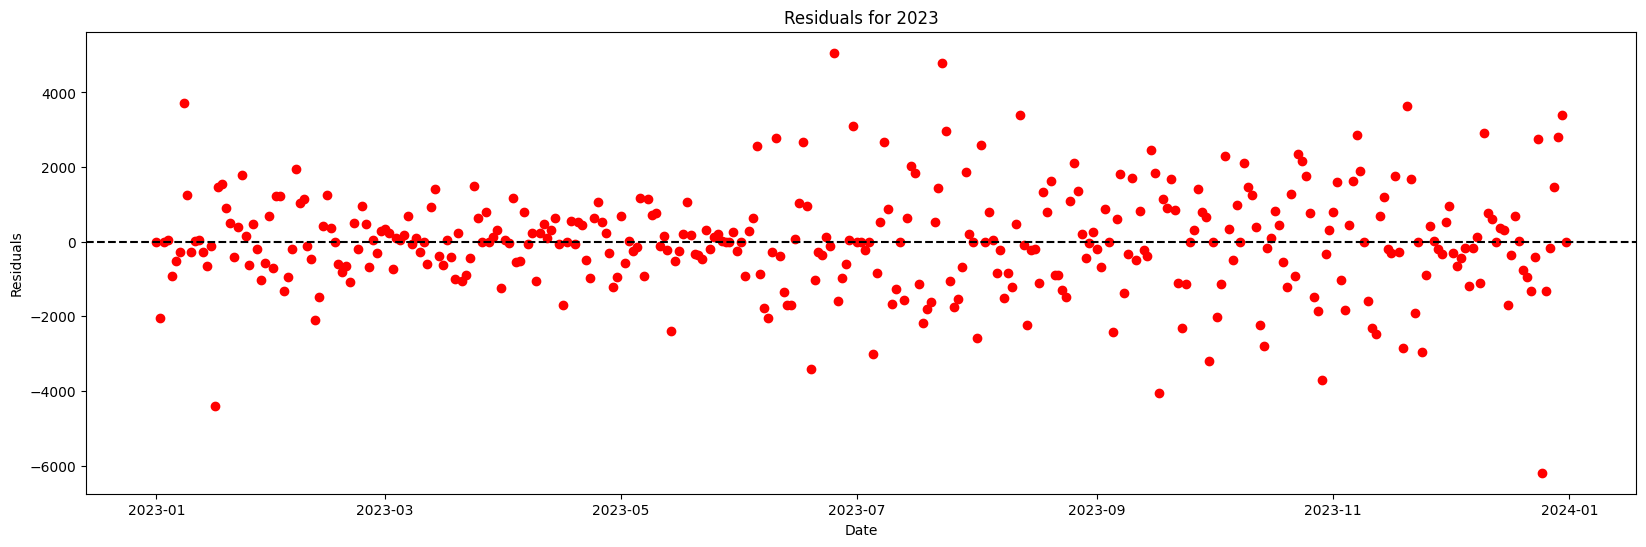

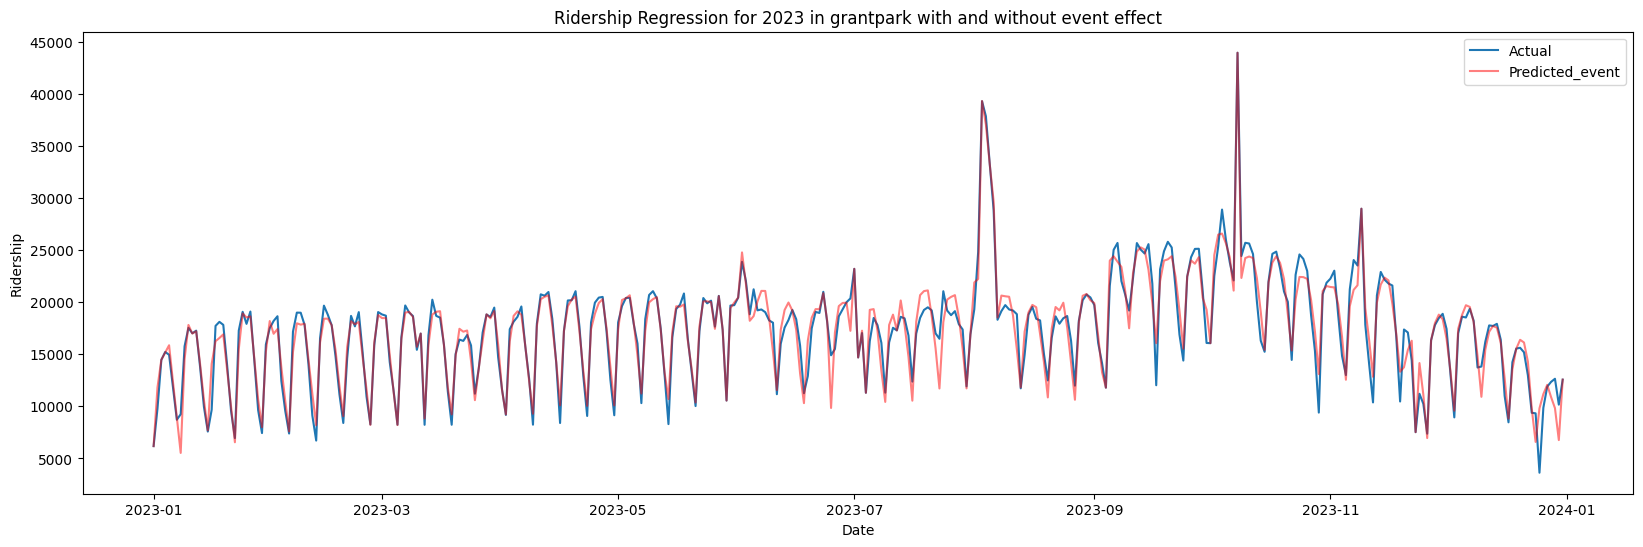

In [6]:
final_script.main(START_DATE, END_DATE, STATION_DICT)